# Running ML Model _Simple Linear Regression_

## Importing the libraries

In [437]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [416]:
df = pd.read_excel("entrenam_ml_2.xlsx")
df.columns = df.iloc[0]
df = df[1:]
df.head()


,Horario,Lugar,Mes,Año,Age,Dist,Duracmin
1,03-T-N,Palermo,11,2013,27,4.73,38.18
2,03-T-N,Pza Alem,11,2013,27,6.1,49.47
3,03-T-N,Pza Alem,11,2013,27,0.88,6.22
4,03-T-N,Pza Alem,11,2013,27,1.45,10.9
5,03-T-N,Pza Alem,11,2013,27,4.07,34.15


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 1 to 281
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Horario   281 non-null    object
 1   Lugar     281 non-null    object
 2   Mes       281 non-null    object
 3   Año       281 non-null    object
 4   Age       281 non-null    object
 5   Dist      281 non-null    object
 6   Duracmin  281 non-null    object
dtypes: object(7)
memory usage: 15.5+ KB


In [418]:
df.drop(["Horario", "Lugar", "Mes", "Año", "Age"], axis=1, inplace=True)
df["Dist"] = df["Dist"].astype(np.float64)
df["Duracmin"] = df["Duracmin"].astype(np.float64)
df.head()

,Dist,Duracmin
1,4.73,38.18
2,6.10,49.47
3,0.88,6.22
4,1.45,10.90
5,4.07,34.15


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 1 to 281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dist      281 non-null    float64
 1   Duracmin  281 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [420]:
X = df.iloc[:, 0].values
Y = df.iloc[:, -1].values

In [421]:
x = np.array(X).reshape(281, 1)
print(x)

[[ 4.73]
 [ 6.1 ]
 [ 0.88]
 [ 1.45]
 [ 4.07]
 [ 2.46]
 [ 8.46]
 [ 3.96]
 [ 4.08]
 [10.34]
 [ 6.65]
 [ 5.  ]
 [ 4.  ]
 [ 5.2 ]
 [10.06]
 [ 3.  ]
 [ 4.3 ]
 [ 5.  ]
 [ 5.47]
 [ 4.  ]
 [ 4.93]
 [ 3.04]
 [ 3.  ]
 [10.29]
 [ 2.42]
 [ 6.  ]
 [ 2.55]
 [ 5.41]
 [ 4.03]
 [ 6.02]
 [10.02]
 [ 7.5 ]
 [15.  ]
 [ 3.01]
 [ 2.87]
 [ 4.27]
 [ 6.16]
 [ 6.28]
 [ 4.04]
 [ 6.06]
 [ 4.21]
 [ 4.67]
 [ 4.02]
 [ 7.01]
 [ 3.42]
 [10.02]
 [ 5.14]
 [10.51]
 [10.86]
 [ 5.2 ]
 [ 3.15]
 [ 6.4 ]
 [ 5.02]
 [ 4.78]
 [ 8.06]
 [ 3.04]
 [10.02]
 [ 3.03]
 [ 8.47]
 [20.01]
 [ 8.02]
 [10.54]
 [ 2.81]
 [ 4.02]
 [ 6.  ]
 [10.27]
 [ 5.05]
 [12.01]
 [21.5 ]
 [ 4.02]
 [ 5.7 ]
 [ 4.01]
 [10.68]
 [ 3.51]
 [ 5.02]
 [ 8.03]
 [ 6.02]
 [ 6.01]
 [ 1.49]
 [ 6.05]
 [ 3.7 ]
 [ 9.  ]
 [ 5.02]
 [ 4.05]
 [ 3.56]
 [ 2.56]
 [ 5.51]
 [ 4.05]
 [ 6.  ]
 [ 6.05]
 [ 5.  ]
 [ 3.04]
 [ 2.86]
 [ 4.4 ]
 [ 3.06]
 [ 5.01]
 [ 5.08]
 [ 8.02]
 [ 5.01]
 [ 5.04]
 [ 5.58]
 [ 1.1 ]
 [ 5.01]
 [ 4.02]
 [ 6.7 ]
 [ 7.03]
 [10.01]
 [10.  ]
 [ 1.12]
 [ 1.9 ]
 [ 9.04]
 

In [422]:
y = np.array(Y).reshape(281, 1)
print(y)

[[ 38.18]
 [ 49.47]
 [  6.22]
 [ 10.9 ]
 [ 34.15]
 [ 21.38]
 [ 73.21]
 [ 29.29]
 [ 33.28]
 [ 76.3 ]
 [ 56.14]
 [ 36.28]
 [ 30.54]
 [ 42.45]
 [ 85.54]
 [ 26.25]
 [ 32.55]
 [ 40.5 ]
 [ 43.8 ]
 [ 29.56]
 [ 35.13]
 [ 22.38]
 [ 19.49]
 [ 69.44]
 [ 16.1 ]
 [ 42.12]
 [ 16.51]
 [ 37.2 ]
 [ 28.48]
 [ 41.  ]
 [ 71.26]
 [ 52.41]
 [109.2 ]
 [ 20.37]
 [ 19.22]
 [ 29.33]
 [ 42.8 ]
 [ 43.47]
 [ 28.24]
 [ 41.21]
 [ 28.11]
 [ 31.3 ]
 [ 26.59]
 [ 45.6 ]
 [ 23.23]
 [ 63.15]
 [ 34.46]
 [ 74.9 ]
 [ 73.47]
 [ 34.44]
 [ 20.2 ]
 [ 43.5 ]
 [ 31.44]
 [ 31.38]
 [ 53.49]
 [ 20.46]
 [ 68.38]
 [ 19.35]
 [ 56.18]
 [138.36]
 [ 56.21]
 [ 69.11]
 [ 19.9 ]
 [ 25.55]
 [ 41.43]
 [ 62.19]
 [ 32.9 ]
 [ 78.12]
 [136.14]
 [ 25.22]
 [ 40.51]
 [ 27.46]
 [ 67.34]
 [ 23.8 ]
 [ 30.47]
 [ 53.47]
 [ 40.39]
 [ 41.13]
 [  9.42]
 [ 40.51]
 [ 25.36]
 [ 64.33]
 [ 35.4 ]
 [ 29.2 ]
 [ 28.15]
 [ 18.23]
 [ 40.3 ]
 [ 28.47]
 [ 42.15]
 [ 41.55]
 [ 35.36]
 [ 22.8 ]
 [ 21.22]
 [ 30.54]
 [ 22.8 ]
 [ 35.25]
 [ 35.55]
 [ 54.3 ]
 [ 35.58]
 [ 33.  ]


## Splitting the dataset into the Training set and Test set

In [423]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [424]:
print(X_train)

[[ 3.36]
 [ 5.41]
 [ 6.79]
 [ 2.7 ]
 [ 4.15]
 [ 4.43]
 [ 7.22]
 [ 6.28]
 [ 9.  ]
 [ 4.47]
 [ 3.22]
 [ 6.07]
 [ 7.02]
 [ 0.62]
 [ 5.38]
 [ 3.06]
 [ 5.39]
 [ 1.9 ]
 [ 3.05]
 [ 3.42]
 [ 3.54]
 [ 4.  ]
 [ 2.56]
 [ 3.16]
 [ 8.06]
 [ 6.65]
 [ 5.47]
 [ 5.55]
 [ 3.69]
 [ 3.7 ]
 [ 5.76]
 [ 4.01]
 [ 3.37]
 [ 3.21]
 [ 5.12]
 [ 1.32]
 [ 8.4 ]
 [ 3.01]
 [ 4.05]
 [ 3.68]
 [ 8.02]
 [ 4.28]
 [ 5.39]
 [ 3.04]
 [ 8.02]
 [ 4.86]
 [ 4.3 ]
 [10.02]
 [ 8.03]
 [ 7.82]
 [ 7.41]
 [ 6.29]
 [ 6.68]
 [ 4.07]
 [ 5.08]
 [ 3.3 ]
 [10.54]
 [ 1.12]
 [12.01]
 [ 5.02]
 [ 5.05]
 [ 2.55]
 [ 1.45]
 [ 2.29]
 [ 6.51]
 [ 4.63]
 [ 4.21]
 [ 2.71]
 [ 5.2 ]
 [10.  ]
 [ 2.18]
 [ 6.53]
 [ 1.45]
 [ 0.83]
 [ 4.83]
 [ 2.42]
 [10.02]
 [ 6.01]
 [ 7.2 ]
 [ 4.57]
 [ 4.  ]
 [ 2.81]
 [ 4.1 ]
 [ 4.11]
 [ 3.7 ]
 [ 6.4 ]
 [ 0.88]
 [ 1.67]
 [ 6.7 ]
 [ 3.53]
 [ 5.51]
 [ 6.65]
 [ 7.8 ]
 [ 8.47]
 [ 4.67]
 [10.06]
 [ 3.15]
 [ 3.68]
 [ 0.92]
 [ 3.85]
 [ 2.81]
 [ 5.24]
 [10.61]
 [ 6.35]
 [ 5.28]
 [ 4.1 ]
 [ 7.01]
 [ 5.12]
 [ 4.5 ]
 [ 5.08]
 [ 7.13]
 

In [425]:
print(X_test)

[[ 6.05]
 [ 4.  ]
 [ 6.14]
 [ 3.11]
 [ 6.  ]
 [ 2.54]
 [ 8.76]
 [ 6.78]
 [ 1.15]
 [ 6.02]
 [ 3.35]
 [ 3.49]
 [ 7.23]
 [ 3.85]
 [ 3.  ]
 [ 4.29]
 [ 2.86]
 [ 8.02]
 [ 3.  ]
 [ 3.78]
 [ 4.02]
 [ 4.16]
 [ 4.02]
 [ 4.38]
 [ 4.91]
 [20.01]
 [ 5.02]
 [10.01]
 [ 9.04]
 [ 4.08]
 [ 2.46]
 [10.01]
 [ 3.2 ]
 [ 3.31]
 [ 0.62]
 [ 3.96]
 [ 3.54]
 [ 6.1 ]
 [10.02]
 [ 5.  ]
 [ 3.86]
 [ 4.01]
 [ 7.73]
 [ 3.04]
 [ 3.83]
 [ 3.5 ]
 [ 8.07]
 [ 1.39]
 [ 3.44]
 [ 3.51]
 [ 1.1 ]
 [ 4.93]
 [ 5.14]
 [ 2.86]
 [ 6.06]
 [ 6.14]
 [ 4.18]]


In [426]:
print(y_train)

[[ 23.35]
 [ 37.2 ]
 [ 48.58]
 [ 21.9 ]
 [ 27.26]
 [ 33.5 ]
 [ 49.12]
 [ 43.47]
 [ 64.33]
 [ 30.22]
 [ 22.31]
 [ 41.15]
 [ 52.36]
 [  6.24]
 [ 40.19]
 [ 22.41]
 [ 39.33]
 [ 12.17]
 [ 27.42]
 [ 23.23]
 [ 25.53]
 [ 28.  ]
 [ 25.24]
 [ 27.  ]
 [ 53.49]
 [ 48.5 ]
 [ 43.8 ]
 [ 38.46]
 [ 25.33]
 [ 28.51]
 [ 47.11]
 [ 27.46]
 [ 24.1 ]
 [ 30.51]
 [ 35.21]
 [  9.4 ]
 [ 55.2 ]
 [ 20.37]
 [ 29.2 ]
 [ 24.32]
 [ 56.21]
 [ 28.59]
 [ 37.1 ]
 [ 22.38]
 [ 55.16]
 [ 43.29]
 [ 32.55]
 [ 68.38]
 [ 53.47]
 [ 57.59]
 [ 52.29]
 [ 54.4 ]
 [ 46.44]
 [ 34.15]
 [ 35.55]
 [ 23.5 ]
 [ 69.11]
 [  8.11]
 [ 78.12]
 [ 31.44]
 [ 32.9 ]
 [ 16.51]
 [ 11.13]
 [ 16.25]
 [ 45.3 ]
 [ 31.39]
 [ 28.11]
 [ 20.52]
 [ 42.45]
 [ 66.56]
 [ 16.7 ]
 [ 43.4 ]
 [ 10.9 ]
 [  7.32]
 [ 36.57]
 [ 16.1 ]
 [ 71.26]
 [ 41.13]
 [ 49.07]
 [ 33.3 ]
 [ 29.56]
 [ 21.16]
 [ 28.33]
 [ 28.28]
 [ 25.36]
 [ 43.5 ]
 [  6.22]
 [ 20.38]
 [ 44.3 ]
 [ 26.7 ]
 [ 40.3 ]
 [ 56.14]
 [ 53.53]
 [ 56.18]
 [ 31.3 ]
 [ 85.54]
 [ 20.2 ]
 [ 24.41]
 [  7.29]
 [ 35.11]


In [427]:
print(y_test)

[[ 41.55]
 [ 30.54]
 [ 49.37]
 [ 23.16]
 [ 41.43]
 [ 21.56]
 [ 59.19]
 [ 41.57]
 [  7.21]
 [ 40.39]
 [ 22.49]
 [ 26.21]
 [ 58.  ]
 [ 38.14]
 [ 26.25]
 [ 30.2 ]
 [ 21.22]
 [ 54.3 ]
 [ 19.49]
 [ 27.2 ]
 [ 25.55]
 [ 29.5 ]
 [ 29.36]
 [ 29.33]
 [ 38.54]
 [138.36]
 [ 30.47]
 [ 66.1 ]
 [ 64.24]
 [ 33.28]
 [ 21.38]
 [ 66.42]
 [ 33.38]
 [ 23.51]
 [  4.33]
 [ 29.29]
 [ 30.16]
 [ 40.42]
 [ 63.15]
 [ 35.36]
 [ 29.34]
 [ 26.13]
 [ 55.8 ]
 [ 20.46]
 [ 27.38]
 [ 24.22]
 [ 52.53]
 [  9.44]
 [ 22.3 ]
 [ 23.8 ]
 [  7.33]
 [ 35.13]
 [ 34.46]
 [ 30.22]
 [ 41.1 ]
 [ 43.49]
 [ 25.38]]


## Training the Simple Linear Regression model on the Training set

In [428]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [429]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

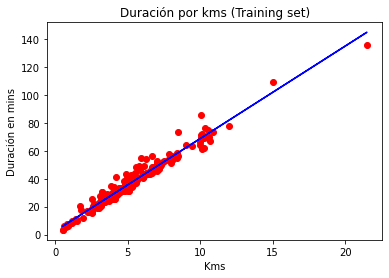

In [432]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Duración por kms (Training set)')
plt.xlabel('Kms')
plt.ylabel('Duración en mins')
plt.show()

## Visualising the Test set results

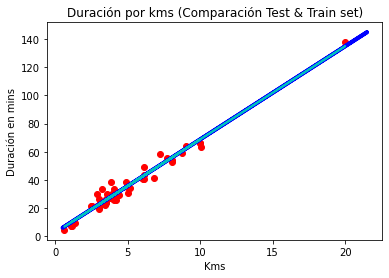

In [436]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', linewidth=4)
plt.plot(X_test, y_pred, color = "c", linewidth=2)
plt.title('Duración por kms (Comparación Test & Train set)')
plt.xlabel('Kms')
plt.ylabel('Duración en mins')
plt.show()